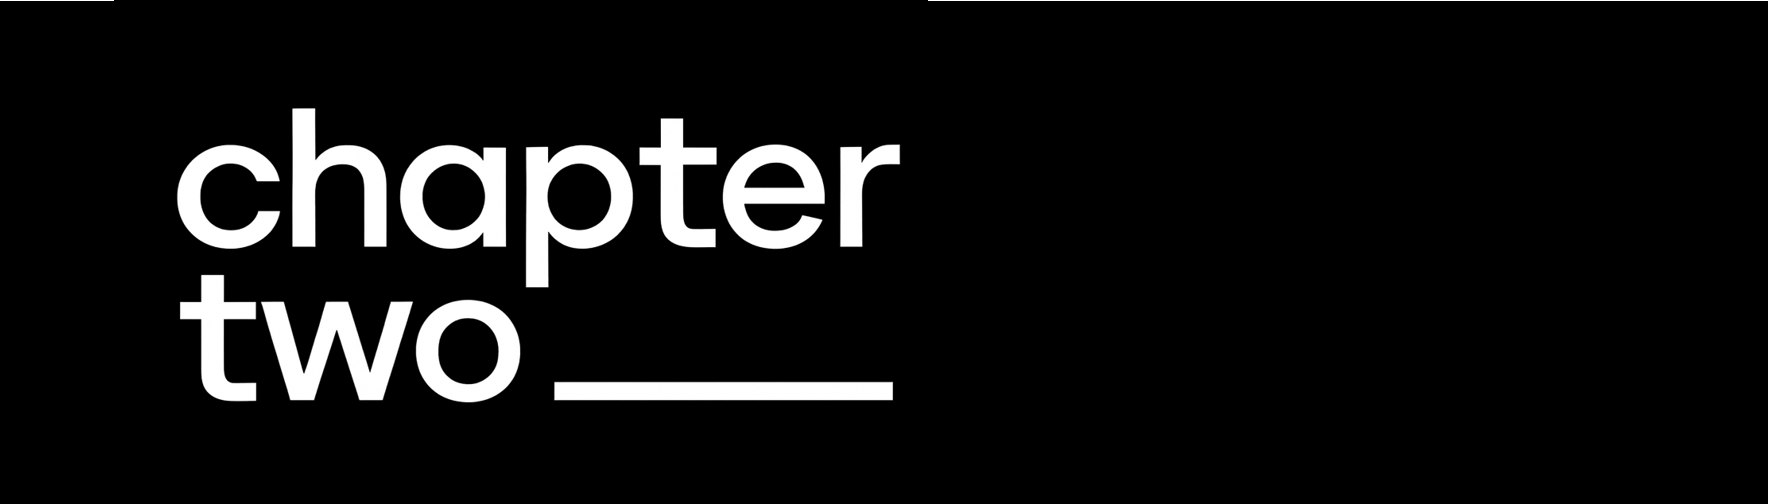



**This note book covers:**


1.   Building an understanding of machine learning algorithms
2.   Using Pandas, Numpy, and Matplotlib to read in, process and visualize data
3.   Implementing linear classifiers for 2-class problems in python


# **🧠 Artificial Neurons**

Artificial neurons are the fundamental building blocks of Artificial Neural Networks. They are inspired by biological neurons in the human brain but simplified for mathematical modeling.

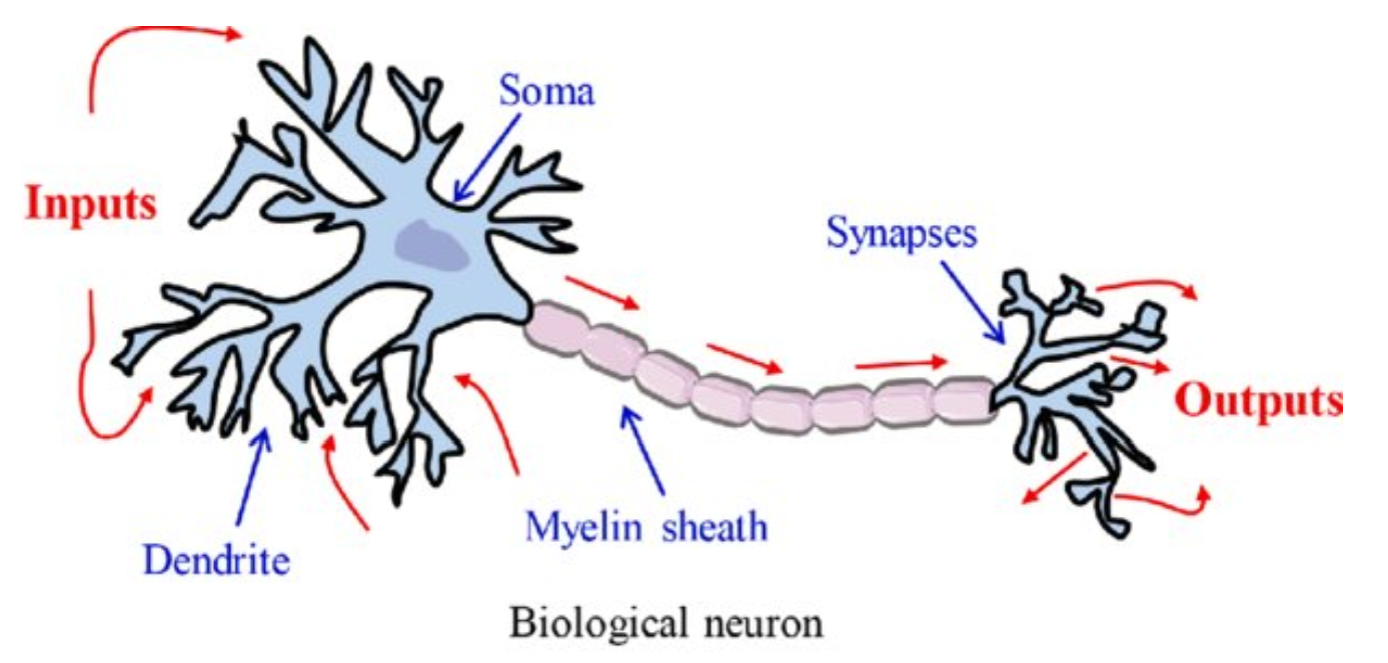

# **The Formal Definition of Artificial Neuron**

## **📌Artificial Neuron**

### **🔹 How an Artificial Neuron Works**

*   Receives multiple input signals

*   Multiplies each input by a weight (importance factor)

*   Adds a bias (threshold adjustment)

*   Passes the result through an activation function to produce an output

Formula:
Given input vector **x** and weight vector **w**:

$$
\mathbf{x} =
\begin{bmatrix}
x_1 \\
x_2 \\
\vdots \\
x_n
\end{bmatrix},
\quad
\mathbf{w} =
\begin{bmatrix}
w_1 \\
w_2 \\
\vdots \\
w_n
\end{bmatrix}
$$

and **b** be the bias.The neuron computes a weighted sum:

$$
z = \mathbf{w}^T \mathbf{x} + b
$$

Then applies a nonlinear activation function \( f( . ) \) such as ReLU and Sigmoid:

$$
\text{output} = f(z)
$$
The activation function introduces non-linearity, allowing the network to learn complex patterns.

### **✔️ Perceptron**

The perceptron is the simplest form of an artificial neuron and is used for **binary classification**.

It makes a decision based on a threshold:

$$
\hat{y} =
\begin{cases}
1 & \text{if } \mathbf{w}^T \mathbf{x} + b \ge 0 \\
0 & \text{otherwise}
\end{cases}
$$


### **🔁 Perceptron Learning Rule**

During training, the perceptron updates its weights and bias based on the prediction error:

$$
\mathbf{w} \leftarrow \mathbf{w} + \eta (y - \hat{y}) \mathbf{x}
$$

$$
b \leftarrow b + \eta (y - \hat{y})
$$

Where:  

- $y$: true label  
- $\hat{y}$: predicted label  
- $\eta$: learning rate

📌 The perceptron can only solve **linearly separable** classification problems.  
It forms the foundation for multi-layer networks and modern **Deep Learning**.

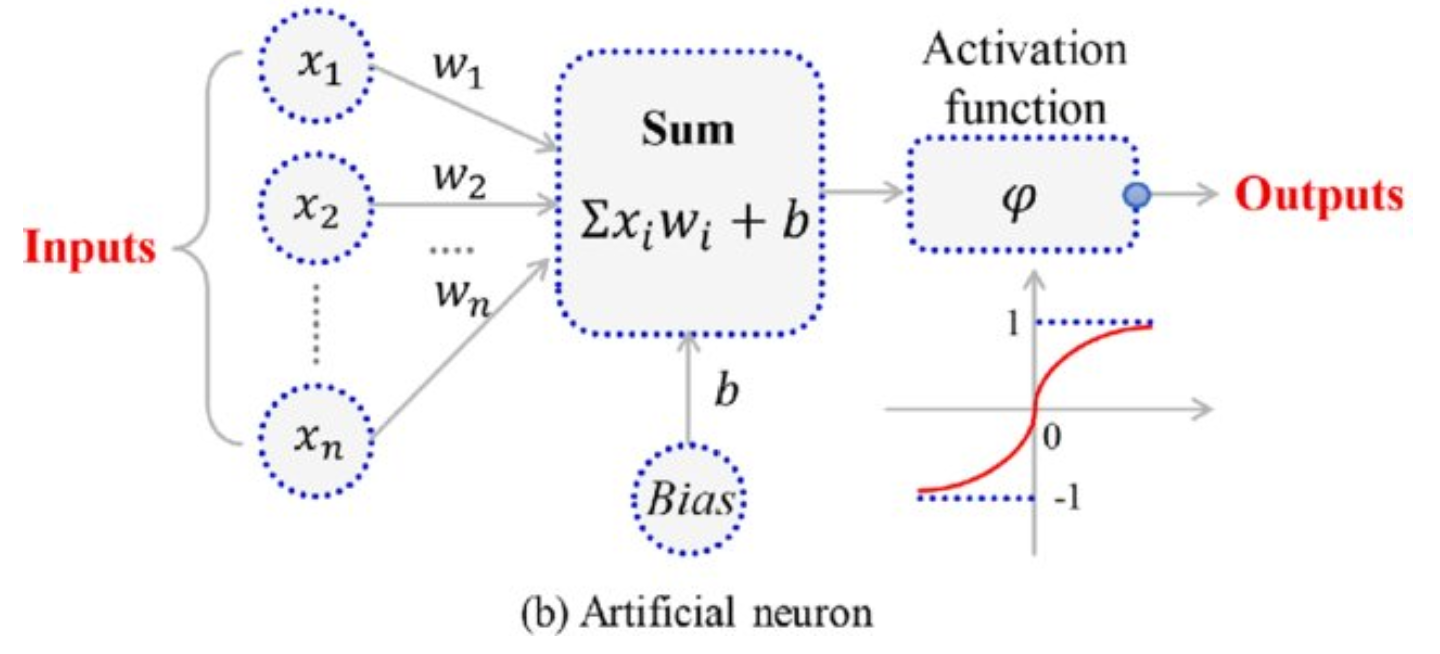

In [43]:
from sklearn.linear_model import Perceptron
Perceptron??

# **Training Perceptron model on iris dataset**

In [44]:
# import libraries
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

In [45]:
# import data and turn to dataframe
iris=load_iris()
df = pd.DataFrame(iris.data, columns=list(range(4)))
df[4]=iris.target
display(df.head())

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


**In the next part of the code**


1.    we extract the first 50 samples from class of 0 and the first class 50 samples from class of 1 to train the perceptron model
2.   Data Visualisation


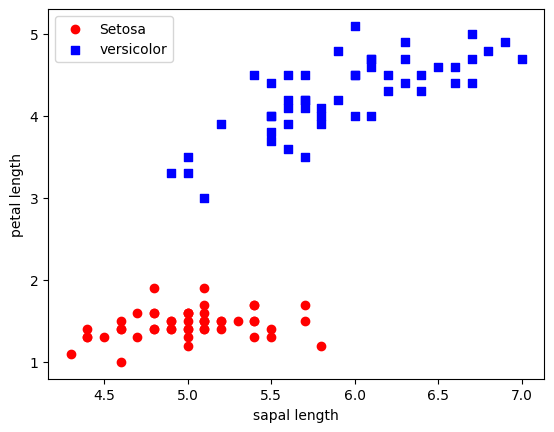

In [46]:
x=df.iloc[0:100,[0,2]]
y=df.iloc[0:100,4]
plt.scatter(x.iloc[:50,0],x.iloc[:50,1],color='red',marker='o' , label='Setosa')
plt.scatter(x.iloc[50:,0],x.iloc[50:,1],color='blue',marker='s' , label='versicolor')
plt.xlabel("sapal length")
plt.ylabel("petal length")
plt.legend(loc="upper left")
plt.show()

###**Single perceptron model using torch**

In [47]:
import torch
import torchvision.ops as nn_ops
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

X_tensor = torch.tensor(x.values, dtype=torch.float32)
y_tensor = torch.tensor(y.values, dtype=torch.float32).view(-1, 1)

model = nn_ops.MLP( in_channels=2,
               hidden_channels=[1],
             )

Loss_Function = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

errors = []
epochs = 10

for epoch in range(epochs):
    optimizer.zero_grad()

    y_pred = model(X_tensor)
    y_pred = F.sigmoid(y_pred)

    # Compute loss
    loss = Loss_Function(y_pred, y_tensor)

    # Compute misclassification error
    predicted_labels = (y_pred >= 0.5).float()  # threshold at 0.5
    error_rate = (predicted_labels != y_tensor).float().mean().item()
    errors.append(error_rate)

    # Backpropagation
    loss.backward()
    optimizer.step()

    print(f"Epoch {epoch+1} - Loss: {loss.item():.4f}")



Epoch 1 - Loss: 0.6348
Epoch 2 - Loss: 0.6040
Epoch 3 - Loss: 0.5829
Epoch 4 - Loss: 0.5630
Epoch 5 - Loss: 0.5440
Epoch 6 - Loss: 0.5261
Epoch 7 - Loss: 0.5091
Epoch 8 - Loss: 0.4929
Epoch 9 - Loss: 0.4776
Epoch 10 - Loss: 0.4631


### **Plot the Misclasification Error**

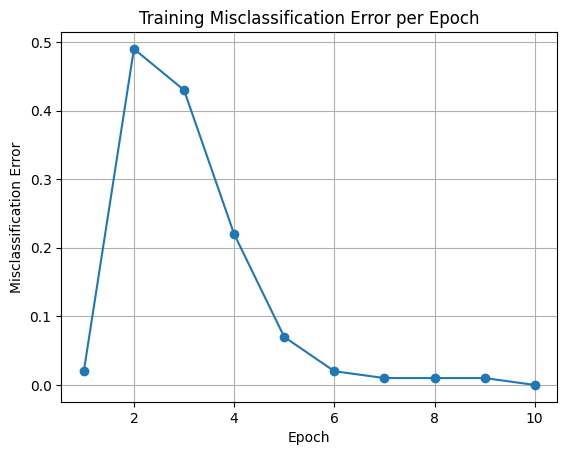

In [48]:
plt.figure()
plt.plot(range(1, epochs+1), errors, marker='o')
plt.xlabel("Epoch")
plt.ylabel("Misclassification Error")
plt.title("Training Misclassification Error per Epoch")
plt.grid(True)
plt.show()